In [1]:
from scipy.stats import pearsonr
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer,normalize,MaxAbsScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, TruncatedSVD, NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.manifold import TSNE


In [2]:
from scipy.stats import norm
import numpy as np

In [3]:
points = [norm.rvs(loc=-0.114585,scale=1.0953972,size=300),norm.rvs(loc=-0.065677,scale=0.800248,size=300)]
points = np.array(points).reshape(300,2)

new_points = [norm.rvs(loc=-0.114585,scale=1.0953972,size=300),norm.rvs(loc=-0.065677,scale=0.800248,size=300)]
new_points = np.array(new_points).reshape(300,2)

In [8]:

df = pd.read_csv('data/Wikipedia articles/wikipedia-vectors.csv', index_col=0)
articles = csr_matrix(df.transpose())
titles = list(df.columns)

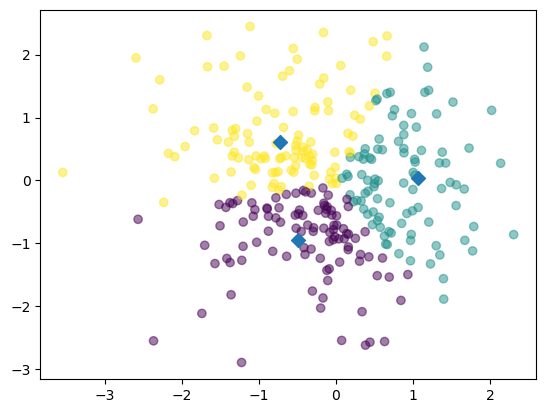

In [9]:
model = KMeans(n_clusters=3)
model.fit(points)
labels = model.predict(new_points)

# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys,c=labels,alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker='D',s=50)
plt.show()

In [17]:
seeds = pd.read_csv('data/Grains/seeds.csv', index_col=False,header=None)
samples = seeds.drop(7,axis=1,inplace=False)
varieties = seeds.iloc[:,7]

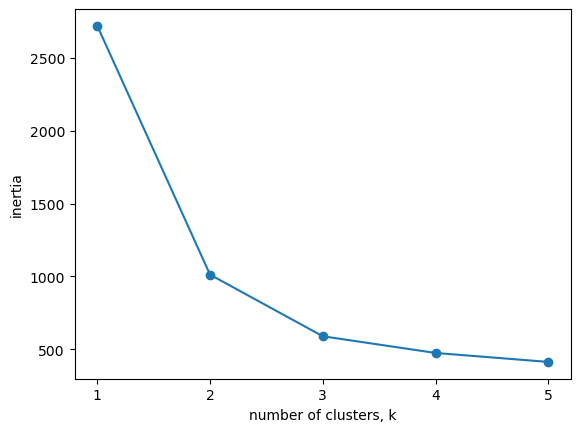

In [18]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [19]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])

# Display ct
print(ct)

varieties   1   2   3
labels               
0           1  60   0
1           9   0  68
2          60  10   2


In [21]:
fish = pd.read_csv('data/fish.csv', index_col=False,header=None)
species = fish.iloc[:,0]
samples = fish.drop(0,axis=1,inplace=False)

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,kmeans)
# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'species': species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['species'])
# Display ct
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0            0     0      0     13
1            1     0     19      1
2           33     0      1      0
3            0    17      0      0


In [22]:
money = pd.read_csv('data/company-stock-movements-2010-2015-incl.csv')
companies = money.iloc[:,0]
movements = money.drop("Unnamed: 0",axis=1,inplace=False)
movements = np.array(movements)
companies = np.array(companies)

In [23]:
# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer,kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))


    labels                           companies
37       0                            Novartis
25       0                   Johnson & Johnson
19       0                     GlaxoSmithKline
0        1                               Apple
35       1                            Navistar
32       1                                  3M
13       1                   DuPont de Nemours
53       1                       Valero Energy
44       1                        Schlumberger
8        1                         Caterpillar
1        1                                 AIG
58       2                               Xerox
21       2                               Honda
48       2                              Toyota
34       2                          Mitsubishi
22       2                                  HP
45       2                                Sony
7        2                               Canon
15       2                                Ford
46       3                      Sanofi-Aventis
49       3   

In [24]:
seeds = pd.read_csv('data/Grains/seeds.csv', index_col=False,header=None)
varieties = seeds.iloc[0:42,7]
samples = seeds.drop(7,axis=1,inplace=False)
samples = samples[0:42]

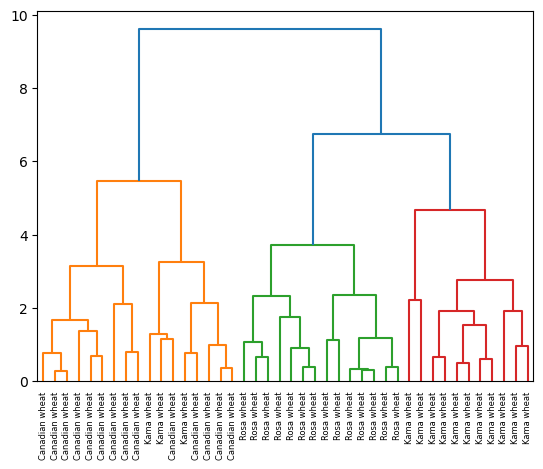

In [25]:
import json

with open('data/Grains/samples.json', 'r') as file:
    samples = json.load(file)

with open('data/Grains/varieties.json', 'r') as file:
    varieties = json.load(file)

samples = np.array(samples["array"])
varieties = np.array(varieties["varieties"])
    
# Calculate the linkage: mergings
mergings = linkage(samples,method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

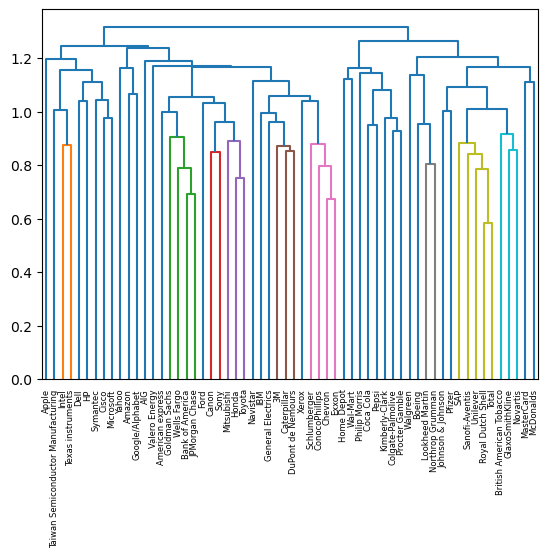

In [26]:
# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements,'complete')

# Plot the dendrogram
dendrogram(mergings,
           labels=companies,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

In [ ]:
euro = pd.read_csv('data/eurovision-2016.csv')
np.shape(euro)

(1066, 11)

In [27]:
with open('data/eurovision_samples.json', 'r') as file:
    samples = json.load(file)

with open('data/eurovision-country_names.json', 'r') as file:
    country_names = json.load(file)

country_names = np.array(country_names["countries"])
samples = np.array(samples["array"])

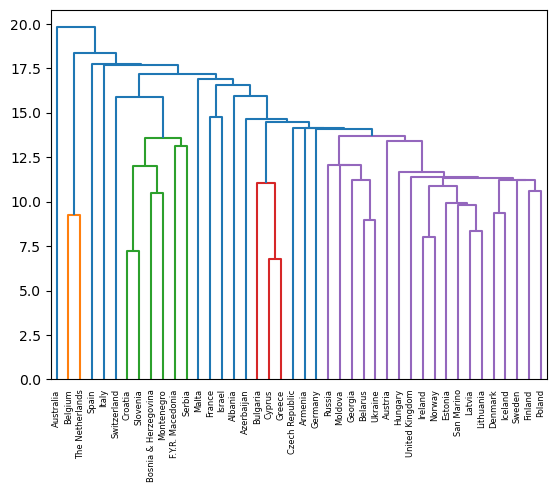

In [28]:
# Calculate the linkage: mergings
mergings = linkage(samples,method='single')

# Plot the dendrogram
dendrogram(mergings,
           labels=country_names,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()


In [29]:
with open('data/Grains/samples.json', 'r') as file:
    samples = json.load(file)
samples = np.array(samples["array"])
mergings = linkage(samples,method='complete')
labels = fcluster(mergings,t = 6, criterion='distance')

labels

array([3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [30]:
# Use fcluster to extract labels: labels
labels = fcluster(mergings,t = 6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])

# Display ct
print(ct)


varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                      14           3           0
2                       0           0          14
3                       0          11           0


In [31]:
with open('data/Grains/variety_number.json', 'r') as file:
    variety_numbers = json.load(file)
variety_numbers =  np.array(variety_numbers["array"])

In [32]:
seeds = pd.read_csv('data/Grains/seeds.csv', index_col=False,header=None)
samples = seeds.drop(7,axis=1,inplace=False)
#samples = samples[0:42]

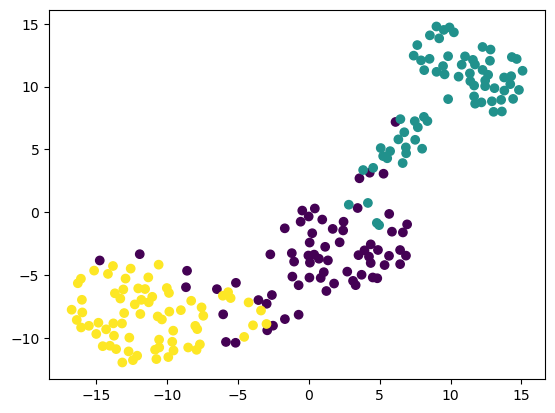

In [33]:
# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c=variety_numbers)
plt.show()

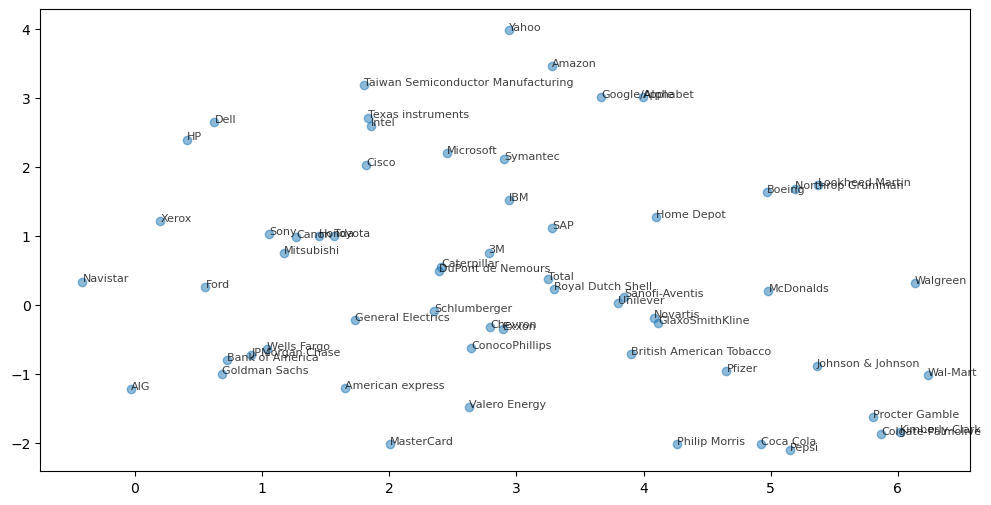

In [62]:
# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.figure(figsize=(12,6))
plt.scatter(xs,ys,alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=8, alpha=0.75)
plt.show()


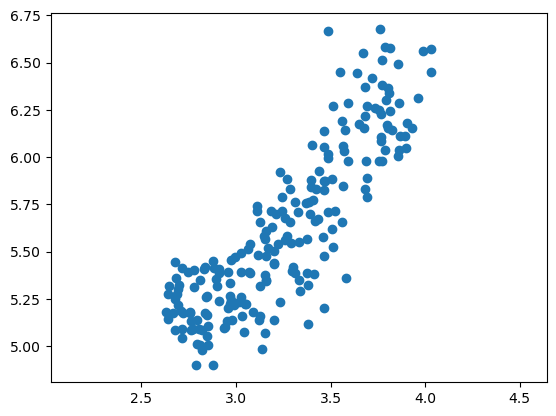

0.860414937714346


In [35]:
grains = pd.read_csv("data/Grains/seeds-width-vs-length.csv",header=None)
# Assign the 0th column of grains: width
width = grains.iloc[:,0]

# Assign the 1st column of grains: length
length = grains.iloc[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)

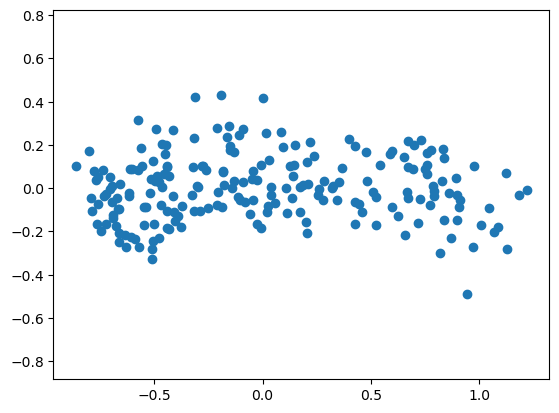

-5.349273947971154e-15


In [36]:
# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

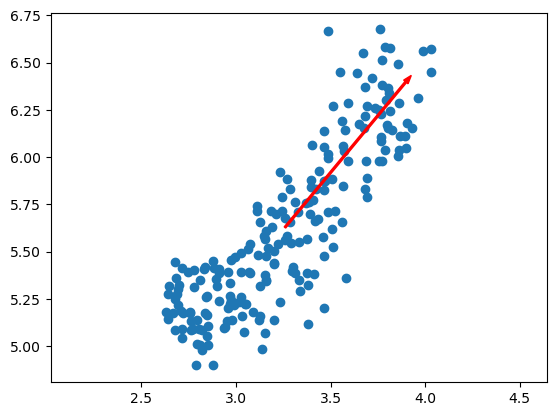

In [37]:
# Make a scatter plot of the untransformed points
plt.scatter(grains.iloc[:,0], grains.iloc[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
pca_features = model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

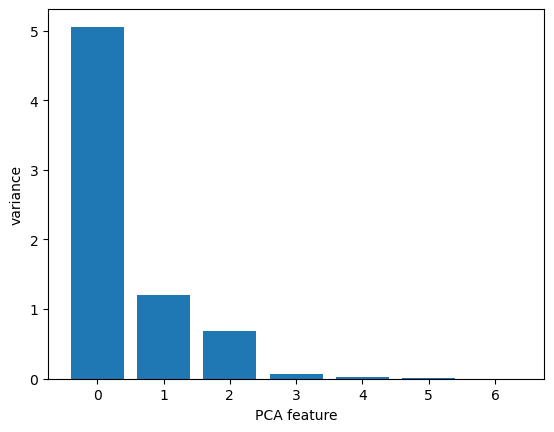

In [38]:
# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


In [39]:
with open('data/fish_scaled_samples.json', 'r') as file:
    scaled_samples = json.load(file)
scaled_samples =  np.array(scaled_samples["array"])

# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)


(85, 2)


In [40]:
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']
# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names_out()

# Print words
print(words)


[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats' 'chase' 'dogs' 'meow' 'say' 'woof']


In [41]:
# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd,kmeans)

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))


    label                                        article
38      0                                         Neymar
0       1                                       HTTP 404
22      1                              Denzel Washington
23      1                           Catherine Zeta-Jones
24      1                                   Jessica Biel
25      1                                  Russell Crowe
27      1                                 Dakota Fanning
30      1                  France national football team
31      1                              Cristiano Ronaldo
32      1                                   Arsenal F.C.
33      1                                 Radamel Falcao
34      1                             Zlatan Ibrahimović
35      1                Colombia national football team
36      1              2014 FIFA World Cup qualification
37      1                                       Football
39      1                                  Franck Ribéry
21      1                      

In [42]:
# Create an NMF instance: model
model = NMF(n_components = 6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features.round(2))

[[0.   0.   0.   0.   0.   0.44]
 [0.   0.   0.   0.   0.   0.56]
 [0.   0.   0.   0.   0.   0.4 ]
 [0.   0.   0.   0.   0.   0.38]
 [0.   0.   0.   0.   0.   0.48]
 [0.01 0.01 0.01 0.03 0.   0.33]
 [0.   0.   0.02 0.   0.01 0.36]
 [0.   0.   0.   0.   0.   0.49]
 [0.02 0.01 0.   0.02 0.03 0.48]
 [0.01 0.03 0.03 0.07 0.02 0.34]
 [0.   0.   0.53 0.   0.03 0.  ]
 [0.   0.   0.35 0.   0.   0.  ]
 [0.01 0.01 0.31 0.06 0.01 0.02]
 [0.   0.01 0.34 0.01 0.   0.  ]
 [0.   0.   0.43 0.   0.04 0.  ]
 [0.   0.   0.48 0.   0.   0.  ]
 [0.01 0.02 0.37 0.03 0.   0.01]
 [0.   0.   0.48 0.   0.   0.  ]
 [0.   0.01 0.55 0.   0.   0.  ]
 [0.   0.   0.46 0.   0.   0.  ]
 [0.   0.01 0.02 0.51 0.06 0.01]
 [0.   0.   0.   0.51 0.   0.  ]
 [0.   0.01 0.   0.42 0.   0.  ]
 [0.   0.   0.   0.43 0.   0.  ]
 [0.   0.   0.   0.49 0.   0.  ]
 [0.1  0.09 0.   0.38 0.   0.01]
 [0.   0.   0.   0.57 0.   0.01]
 [0.01 0.01 0.   0.47 0.   0.01]
 [0.   0.   0.   0.57 0.   0.  ]
 [0.   0.   0.   0.52 0.01 0.01]
 [0.   0.4

In [43]:
# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features,index=titles)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])


0    0.003815
1    0.000000
2    0.000000
3    0.571867
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64
0    0.000000
1    0.005575
2    0.000000
3    0.419564
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


In [44]:
words = pd.read_csv('data/Wikipedia articles/wikipedia-vocabulary-utf8.txt', header=None)
words.columns = ['words']


In [45]:
words = np.array(words)

In [47]:
# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_,columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3,:]

# Print result of nlargest
print(component.nlargest())

(6, 13125)
(film,)       0.632104
(award,)      0.254833
(starred,)    0.246936
(role,)       0.212874
(actress,)    0.187652
Name: 3, dtype: float64


In [48]:
samples = pd.read_csv('data/lcd-digits.csv', header=None)
samples = np.array(samples)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


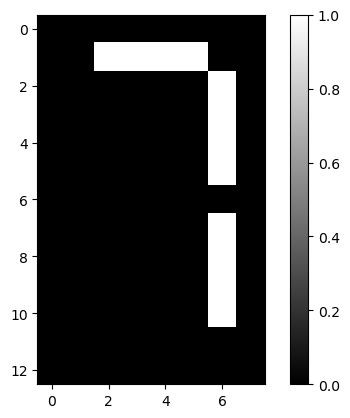

In [49]:
# Select the 0th row: digit
digit = samples[0,:]

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape(13,8)

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()


In [50]:
# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999973
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64


In [51]:
df_artists_names = pd.read_csv('data/Musical artists/artists.csv',header=None)
df = pd.read_csv('data/Musical artists/scrobbler-small-sample.csv')


In [52]:
artist_names = np.array(df_artists_names[0])

In [53]:
artists=df.pivot_table(values='playcount',index='artist_offset',columns='user_offset')
artists.fillna(0, inplace=True)

artists = csr_matrix(artists)
artists

<111x500 sparse matrix of type '<class 'numpy.float64'>'
	with 2894 stored elements in Compressed Sparse Row format>

In [54]:
# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler,nmf,normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)


In [55]:
# Create a DataFrame: df
df = pd.DataFrame(norm_features, index = artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())

Bruce Springsteen    1.000000
Leonard Cohen        0.962648
Neil Young           0.949356
The Beach Boys       0.859250
Van Morrison         0.833648
dtype: float64
